In [1]:
import numpy as np
from ripser import ripser
import sklearn
import matplotlib.pyplot as plt
from persim import plot_diagrams
from scipy.sparse.linalg import lsmr
import tadasets
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances


In [2]:
def get_coords(cocycle, threshold, num_sampled, dists, coeff):
    zint = np.where(coeff - cocycle[:, 2] < cocycle[:, 2])
    cocycle[zint, 2] = cocycle[zint, 2] - coeff
    d = np.zeros((num_sampled, num_sampled))
    d[np.tril_indices(num_sampled)] = np.NaN
    d[cocycle[:, 1], cocycle[:, 0]] = cocycle[:, 2]
    d[dists > threshold] = np.NaN
    d[dists == 0] = np.NaN
    edges = np.where(~np.isnan(d))
    verts = np.array(np.unique(edges))
    num_edges = np.shape(edges)[1]
    num_verts = np.size(verts)
    values = d[edges]
    A = np.zeros((num_edges, num_verts), dtype=int)
    v1 = np.zeros((num_edges, 2), dtype=int)
    v2 = np.zeros((num_edges, 2), dtype=int)
    for i in range(num_edges):
        v1[i, :] = [i, int(np.where(verts == edges[0][i])[0][0])]
        v2[i, :] = [i, int(np.where(verts == edges[1][i])[0][0])]

    A[v1[:, 0], v1[:, 1]] = -1
    A[v2[:, 0], v2[:, 1]] = 1
  
    L = np.ones((num_edges,))
    Aw = A * np.sqrt(L[:, np.newaxis])
    Bw = values * np.sqrt(L)
    #print(Aw.shape)
    #print(Bw.shape)
    f = lsmr(Aw, Bw)[0]%1
    print(f.shape)
    return f, verts
    

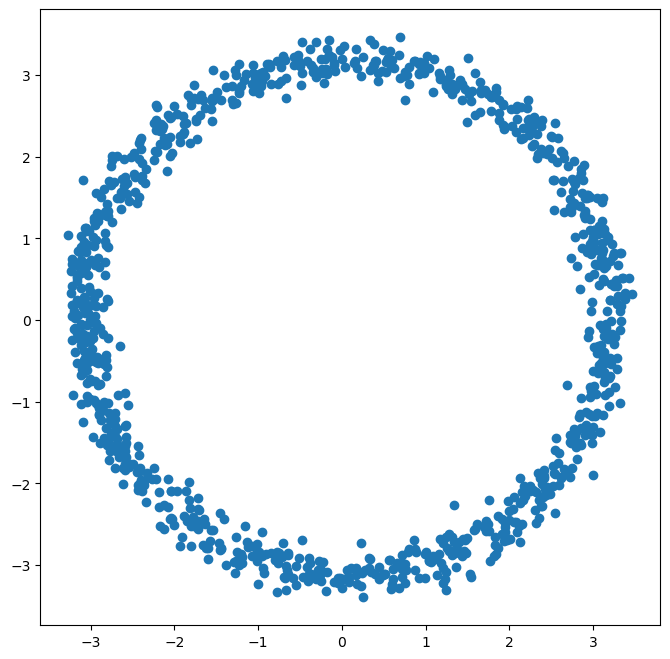

In [39]:
data = tadasets.dsphere(n=1000, d=1, r=3.14, ambient=50, noise=0.14)

pca = PCA(n_components=2)
pca.fit(data[:,:])
y = pca.transform(data[:,:])
plt.figure(figsize=(8, 8)) 
plt.scatter(y[:,0], y[:,1])#, c = angles)
plt.show()

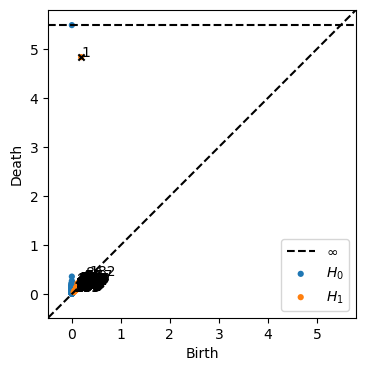

th = 4.83208458328247


In [91]:
"""

regn kohomologi

"""


coeff = 47 #primtall (hyperparam)
cycle = 1 # H_1 du vil dekode
thresh = 20.0 # til pesistence


dists = euclidean_distances(data)

diagrams = ripser(dists,distance_matrix = True, maxdim = 1, thresh = thresh, do_cocycles=True, coeff = coeff)


dgm1 = diagrams['dgms'][1]
idx =np.argsort(dgm1[:, 1] - dgm1[:, 0])[-cycle]
dgm1[idx, 1]
plt.figure(figsize=(4, 4)) 
plot_diagrams(diagrams['dgms'], show=False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'black', 'x') #"k" 
dgm1 = diagrams["dgms"][1]
labels = [str(i) for i in range(dgm1.shape[0])]
for j,i in enumerate(np.argsort(dgm1[:,1] - dgm1[:,0])):
    plt.annotate(str(len(dgm1) -j), (dgm1[i,0], dgm1[i,1]))
plt.show()
cocycle = diagrams["cocycles"][1]

th = dgm1[idx, 1]-0.001
print(f"th = {th}")
num_sampled = data.shape[0]

In [217]:
cocycle[idx]

array([[573, 115,   1],
       [796, 573,  -1],
       [724, 573,  -1],
       ...,
       [585, 267, -50],
       [125,  99,  50],
       [797, 383, -50]])

In [92]:
cocycle[idx][:,-1]

array([ 1, 46,  1, ...,  1,  1, 46])

In [93]:
cocycle[idx][:,-1] = np.mod(cocycle[idx][:,-1]* 10,  coeff)

In [94]:
cocycle[idx][:,-1]

array([10, 37, 10, ..., 10, 10, 37])

In [95]:
#regn ut circ coords

angles, verts = get_coords(cocycle[idx], th, num_sampled, dists, coeff)


(1000,)


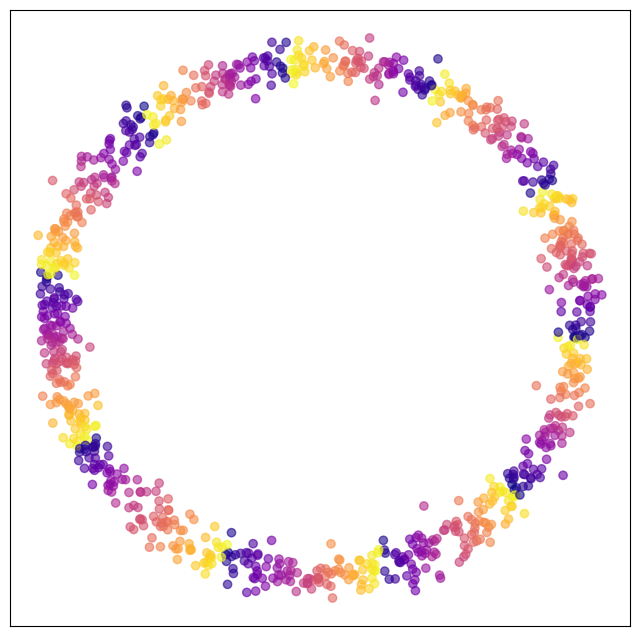

In [96]:
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
pca.fit(data[verts,:])
y = pca.transform(data[verts,:])
plt.figure(figsize=(8, 8)) 
plt.scatter(y[:,0], y[:,1], c = angles, cmap="plasma", alpha=0.6)
plt.xticks([])
plt.yticks([])
plt.show()
